In [79]:
import pandas as pd 
data = pd.read_csv('heart.csv', sep=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
print('1  age - age in years')
print('2  sex - (categorical) 1: male, 0: female')
print('3  cp - chest pain type (categorical) 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic')
print('4  trestbps - resting blood pressure in mm Hg')
print('5  chol - serum cholestoral in mg/dl')
print('6  fbs - fasting blood sugar > 120 mg/dl (categorical) 1 = true and 0 = false')
print('7  restecg - resting electrocardiographic results (categorical) 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes criteria')
print('8  thalach - maximum heart rate achieved')
print('9  exang - exercise induced angina (categorical) 0:no, 1:yes')
print('10  oldpeak - ST depression induced by exercise relative to rest')
print('11  slope - the slope of the peak exercise ST segment (catogorical) 1: upsloping, Value 2: flat, Value 3: downsloping')
print('12  ca - number of major vessels (0-3) colored by flourosopy')
print('13  thal - (categorical) 1: normal, 2: fixed defect, 3: reversable defect')
print('14  target - disease is found or not 1 = yes and 0 = no')

1  age - age in years
2  sex - (categorical) 1: male, 0: female
3  cp - chest pain type (categorical) 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
4  trestbps - resting blood pressure in mm Hg
5  chol - serum cholestoral in mg/dl
6  fbs - fasting blood sugar > 120 mg/dl (categorical) 1 = true and 0 = false
7  restecg - resting electrocardiographic results (categorical) 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes criteria
8  thalach - maximum heart rate achieved
9  exang - exercise induced angina (categorical) 0:no, 1:yes
10  oldpeak - ST depression induced by exercise relative to rest
11  slope - the slope of the peak exercise ST segment (catogorical) 1: upsloping, Value 2: flat, Value 3: downsloping
12  ca - number of major vessels (0-3) colored by flourosopy
13  thal - (categorical) 1: normal, 2: fixed defect, 3: reversable defect
14  target - disease is found or not 1 = yes and 0 = n

In [80]:
set(data.target)

{0, 1}

In [81]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [82]:
nbElm=len(data['cp'])
print("number of view: ",nbElm)
print(data['cp'].value_counts())

nbElm1=len(data['target'])
print("number of view: ",nbElm1)
print(data['target'].value_counts())

nbElm2=len(data['ca'])
print("number of view: ",nbElm2)
print(data['ca'].value_counts())

number of view:  303
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
number of view:  303
1    165
0    138
Name: target, dtype: int64
number of view:  303
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


Text(0.5, 1.0, 'Gender distibution of people without the disease')

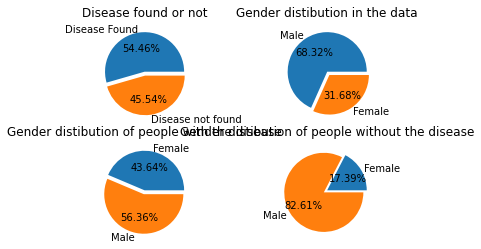

In [83]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.pie(x = data.target.value_counts(),
        labels = ["Disease Found", "Disease not found"], autopct='%1.2f%%', explode = (0, 0.1))
plt.title("Disease found or not")

plt.subplot(222)
plt.pie(x = data.sex.value_counts(),
        labels = ["Male", "Female"], autopct='%1.2f%%', explode = (0, 0.1))
plt.title("Gender distibution in the data")

plt.subplot(223)
plt.pie(x = data.loc[data.target == 1].groupby(['sex']).sex.count().to_list(),
        labels = ["Female", "Male"], autopct='%1.2f%%', explode = (0, 0.1))
plt.title("Gender distibution of people with the disease")

plt.subplot(224)
plt.pie(x = data.loc[data.target == 0].groupby(['sex']).sex.count().to_list(),
        labels = ["Female", "Male"], autopct='%1.2f%%', explode = (0, 0.1))
plt.title("Gender distibution of people without the disease")

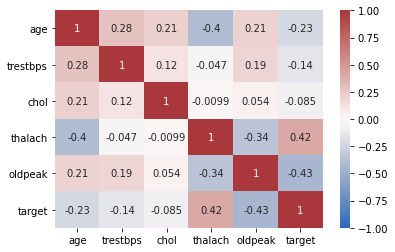

In [52]:
import seaborn as sns

sns.heatmap(data = data.drop(['sex', 'cp', 'ca', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis  = 1).corr(), annot = True,  cmap = "vlag", vmin = -1, vmax = 1, center = 0)

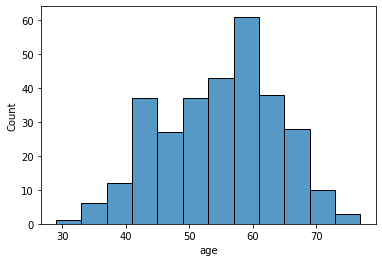

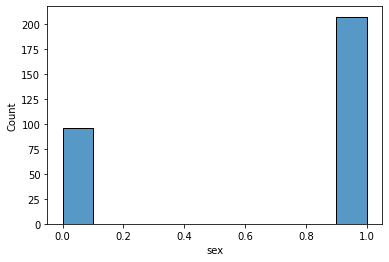

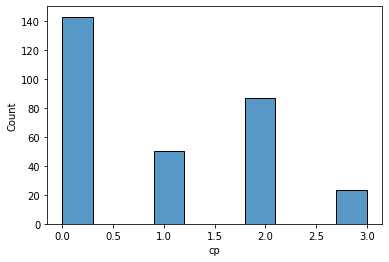

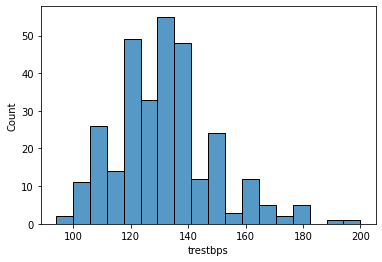

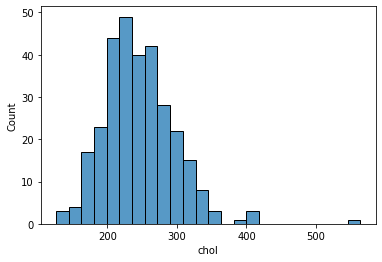

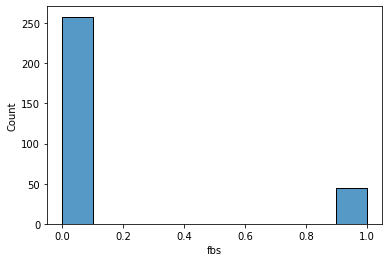

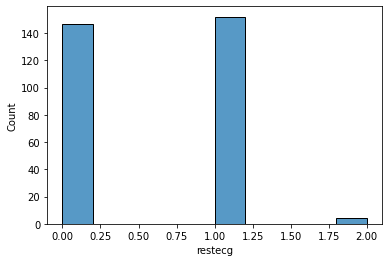

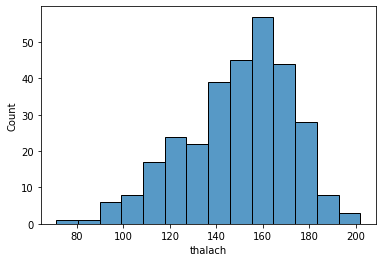

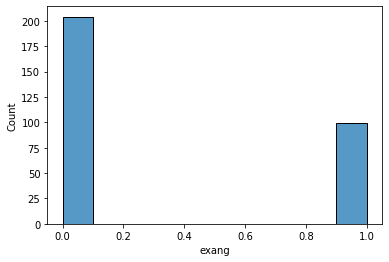

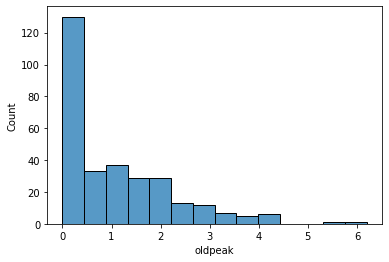

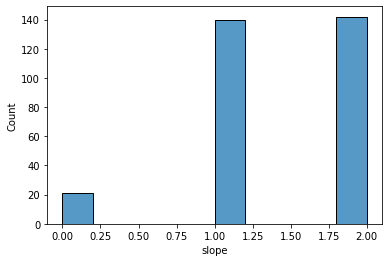

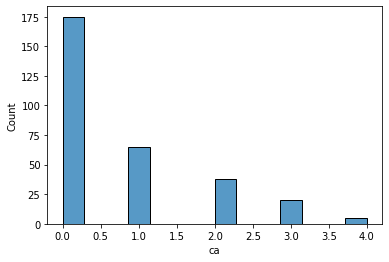

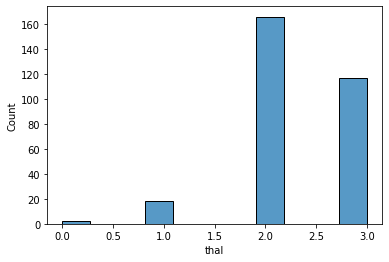

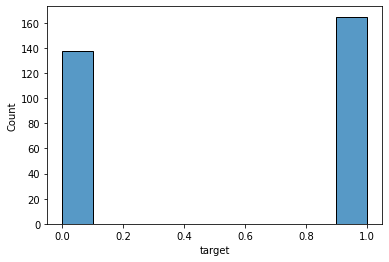

In [10]:
for i in data.columns[:]:
    sns.histplot(data=data, x=i, palette='magma')
    plt.show()

Text(0.5, 1.0, 'Age vs Thalach for Heart Disease')

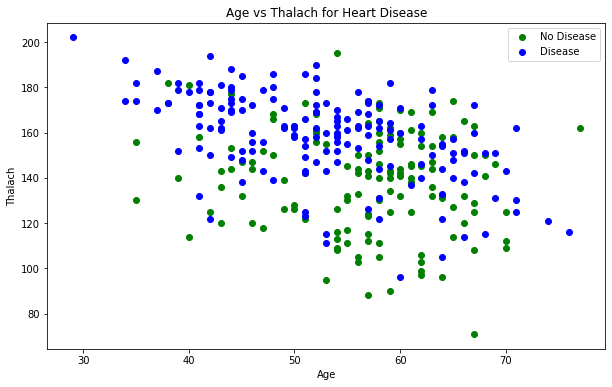

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==0], data.thalach[data.target==0], c="g")
plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c="b")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["No Disease", "Disease"])
plt.title("Age vs Thalach for Heart Disease")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = data[['cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)  

lr = LogisticRegression()   
lr.fit(x_train, y_train)  
y_pred  = lr.predict(x_test)    
print("Accuracy={:.2f}".format(lr.score(x_test, y_test)))

Accuracy=0.82


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
from sklearn.metrics import confusion_matrix

x1 = data['oldpeak'].values.reshape(-1, 1)
y1 =data['target'].values
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42, stratify=y1)
lr = LogisticRegression()

lr.fit(x1_train, y1_train)
preds = lr.predict(x1_test)


tn, fp, fn, tp = confusion_matrix(y1_test, preds).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 33
False Positives: 22
True Negatives: 13
False Negatives: 8


0.5

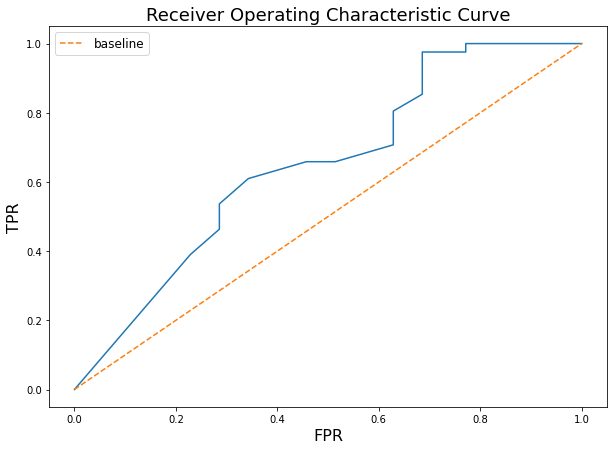

In [78]:
import numpy as np
from sklearn.metrics import roc_auc_score

probas = lr.predict_proba(x1_test)[:, 1]
def get_preds(threshold, probabilities):
  return [1 if prob > threshold else 0 for prob in probabilities]

roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y1_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

roc_auc_score(y1_test, preds)

In [29]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x3=data.drop(["sex", "age"], axis=1)
y3= data["target"]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.30,random_state=10)

tree = tree.DecisionTreeClassifier(max_depth = 30)

tree.fit(x3_train, y3_train)  
y3_pred=tree.predict(x3_test)  
print("Accuracy:{}".format(accuracy_score(y3_test, y3_pred)))


Accuracy:1.0


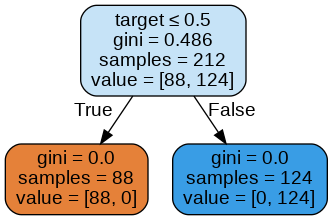

In [84]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,feature_names=x3.columns,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  

clf=RandomForestClassifier(n_estimators=100) 
clf.fit(x3_train, y3_train)  
y4_pred=clf.predict(x3_test) 
print("Accuracy:", metrics.accuracy_score(y3_test, y4_pred))
print("R squared", metrics.r2_score(y3_test,y4_pred))

Accuracy: 1.0
R squared 1.0


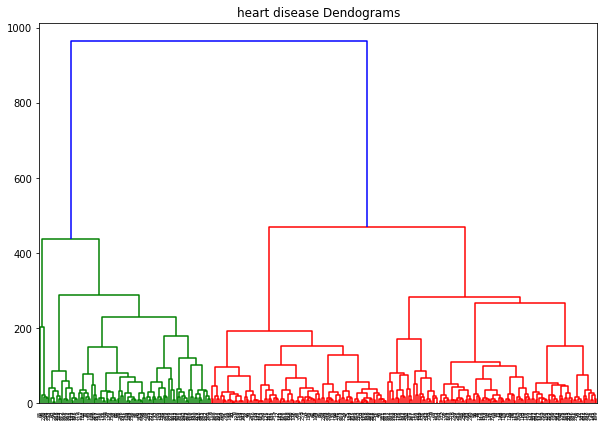

In [86]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("heart disease Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy Score: 0.8131868131868132
MSE 0.18681318681318682
R squared 0.24536585365853647
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        50
           1       0.80      0.78      0.79        41

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



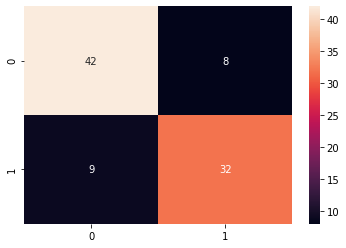

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report


a=data[["sex","thal"]]
b= data["target"]

a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.30,random_state=10)

knn = KNeighborsClassifier().fit(a_train,b_train)
b_preds = knn.predict(a_test)
print(f'Accuracy Score: {accuracy_score(b_test,b_preds)}')
print("MSE", mean_squared_error(b_test,b_preds))
print("R squared", metrics.r2_score(b_test,b_preds))

sns.heatmap(confusion_matrix(b_test,b_preds), annot=True)
print(classification_report(b_test,b_preds))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


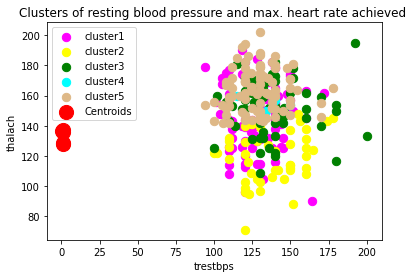

In [60]:
from sklearn.cluster import KMeans    
kmeans = KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(x)

label=pd.DataFrame(kmeans.labels_)
label

x["label"]=label[0]
wcss = [] 
K=range(1, 11)
for k in K: 
    km = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    km.fit(x) 
    wcss.append(km.inertia_)

    
plt.scatter(x["trestbps"][x.label == 0], x["thalach"][x.label == 0],s=70,c='magenta',label='cluster1')
plt.scatter(x["trestbps"][x.label == 1], x["thalach"][x.label == 1],s=70,c='yellow',label='cluster2')
plt.scatter(x["trestbps"][x.label == 2], x["thalach"][x.label == 2],s=70,c='green',label='cluster3')
plt.scatter(x["trestbps"][x.label == 3], x["thalach"][x.label == 3],s=70,c='cyan',label='cluster4')
plt.scatter(x["trestbps"][x.label == 4], x["thalach"][x.label == 4],s=70,c='burlywood',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label = 'Centroids')
plt.title('Clusters of resting blood pressure and max. heart rate achieved ')
plt.xlabel('trestbps')
plt.ylabel('thalach')
plt.legend()
plt.show()

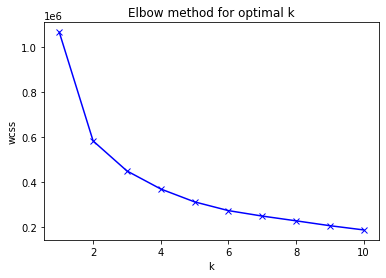

In [58]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow method for optimal k')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(x)


agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,2
...,...
298,0
299,0
300,0
301,1


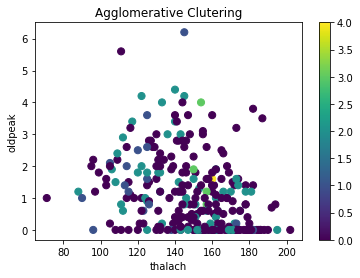

In [101]:
fig =plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter (x["thalach"], x["oldpeak"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("thalach")
ax.set_ylabel("oldpeak")
plt.colorbar(scatter)